This file is for the Wilcoxon Signed Rank Test. We compare each time series against a reference (the mean of all time series). We do it for price time series and investment time series, as these are the foundations of the profit, welfare, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline

In [40]:
from scipy.stats import wilcoxon
from scipy.stats import skew, kurtosis

In [4]:
## Position

position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp01' # Exp02

## Import the data

price_a = pd.read_csv(position + '/prices001 (1).csv', names = list(range(1001)),
                      index_col = False)
price_b = pd.read_csv(position + '/prices_b001 (1).csv', names = list(range(1001)),
                      index_col = False)
inv_a = pd.read_csv(position + '/inv_a_list_new (1).csv', names = list(range(1001)),
                      index_col = False)
inv_b = pd.read_csv(position + '/inv_b_list_new (1).csv', names = list(range(1001)),
                      index_col = False)

In [6]:
stats = pd.read_csv(position + '/stats01_new.csv')

### Wilcoxon on the price list and the investment list

In [17]:
p_a_mean = np.array(stats['p_a_mean'])

In [18]:
p_a_0 = np.array(price_a.loc[0,0:999])

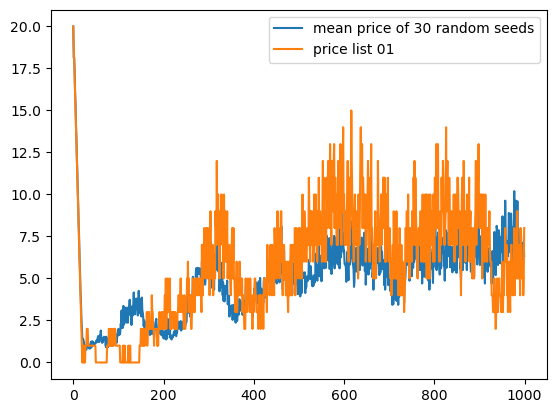

In [26]:
plt.plot(p_a_mean)
plt.plot(p_a_0)
plt.legend(['mean price of 30 random seeds', 'price list 01'])
plt.show()

In [22]:
wilcoxon(p_a_mean, p_a_0)

WilcoxonResult(statistic=134339.5, pvalue=1.0560162101170596e-35)

In [23]:
wilcoxon(p_a_mean, p_a_0)[1] # the pvalue, check if it's smaller than 0.05 (if yes, reject H0)

1.0560162101170596e-35

Very small p value, we reject the H0 (there is no difference between the two groups), the random seed plays an important role. We need more information about the robustness of the model.

In [24]:
inv_a_mean = np.array(stats['inv_a_mean'])
inv_a_0 = np.array(inv_a.loc[0,0:999])

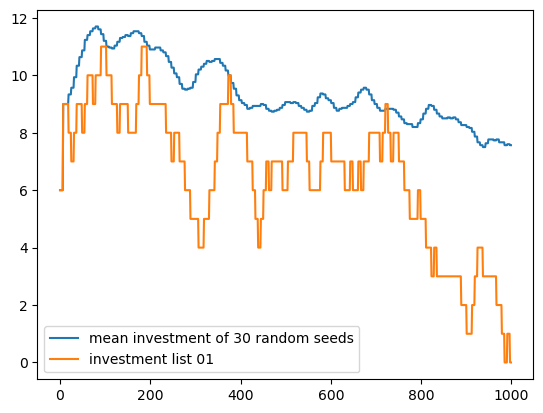

In [27]:
plt.plot(inv_a_mean)
plt.plot(inv_a_0)
plt.legend(['mean investment of 30 random seeds', 'investment list 01'])
plt.show()

In [30]:
wilcoxon(inv_a_mean, inv_a_0)

WilcoxonResult(statistic=39.0, pvalue=4.395638093532435e-161)

We reject H0 here as well.

### Wilcoxon on the moments of the price list and the investment list

In [43]:
## moments: mean, variance, skewness, kurtosis
p_a_mean_01 = np.mean(p_a_mean) # mean of the mean price list
p_a_mean_02 = np.var(p_a_mean)
p_a_mean_03 = skew(p_a_mean)
p_a_mean_04 = kurtosis(p_a_mean)

In [44]:
p_a_mean_03

0.9597239587893311

In [45]:
p_a_i_01 = []
p_a_i_02 = []
p_a_i_03 = []
p_a_i_04 = []

for i in range(len(price_a)):
    p_a_i_01.append(np.mean(price_a.loc[i,0:999]))
    p_a_i_02.append(np.var(price_a.loc[i,0:999]))
    p_a_i_03.append(skew(price_a.loc[i,0:999]))
    p_a_i_04.append(kurtosis(price_a.loc[i,0:999]))

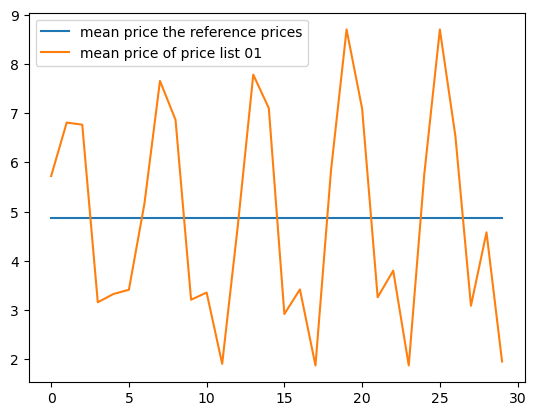

In [51]:
plt.plot([p_a_mean_01]*30)
plt.plot(p_a_i_01)
plt.legend(['mean price the reference prices', 'mean price of price list 01'])
plt.show()

In [52]:
wilcoxon(np.array(p_a_i_01) - p_a_mean_01)[1]

0.9838335812091827

No significant difference here.

Now we record the data of the Wilcoxon test of the first four moments.

In [57]:
pd.DataFrame({'moment': ['mean', 'variance', 'skewness', 'kurtosis'],
              'value of reference': [np.round(p_a_mean_01,2), np.round(p_a_mean_02,2), 
                        np.round(p_a_mean_03,2), np.round(p_a_mean_04,2)],
              'Wilcoxon p-value': [np.round(wilcoxon(np.array(p_a_i_01) - p_a_mean_01)[1],2),
                                  np.round(wilcoxon(np.array(p_a_i_02) - p_a_mean_02)[1],2),
                                  np.round(wilcoxon(np.array(p_a_i_03) - p_a_mean_03)[1],2),
                                  np.round(wilcoxon(np.array(p_a_i_04) - p_a_mean_04)[1],2) 
                                  ]})

,moment,value of reference,Wilcoxon p-value
0,mean,4.88,0.98
1,variance,5.21,0.00
2,skewness,0.96,0.04
3,kurtosis,5.16,0.24


The selection of the random seeds has a significant influence on the variance and kurtosis.

Now we check the other scenarios.

In [88]:
## Price_a

Wilcoxon_p_value_mean = []
Wilcoxon_p_value_var = []
Wilcoxon_p_value_skew = []
Wilcoxon_p_value_kurt = []

for item in range(1, 19):

    ## Position
    if item < 10:
        position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp0' + str(item) # Exp0...
    else:
        position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp' + str(item)

    ## Import the data

    price_a = pd.read_csv(position + '/prices001 (1).csv', names = list(range(1001)),
                          index_col = False)
    
    if item < 10:
        if item > 1:
            stats = pd.read_csv(position + '/stats0' + str(item) + '.csv')
        else:
            stats = pd.read_csv(position + '/stats0' + str(item) + '_new.csv')
    else:
        stats = pd.read_csv(position + '/stats' + str(item) + '_new.csv')
    
    p_a_mean = np.array(stats['p_a_mean'])

    ## moments: mean, variance, skewness, kurtosis
    p_a_mean_01 = np.mean(p_a_mean) # mean of the mean price list
    p_a_mean_02 = np.var(p_a_mean)
    p_a_mean_03 = skew(p_a_mean)
    p_a_mean_04 = kurtosis(p_a_mean)
    
    p_a_i_01 = []
    p_a_i_02 = []
    p_a_i_03 = []
    p_a_i_04 = []

    for i in range(len(price_a)):
        p_a_i_01.append(np.mean(price_a.loc[i,0:999]))
        p_a_i_02.append(np.var(price_a.loc[i,0:999]))
        p_a_i_03.append(skew(price_a.loc[i,0:999]))
        p_a_i_04.append(kurtosis(price_a.loc[i,0:999]))
    
    Wilcoxon_p_value_mean.append(np.round(wilcoxon(np.array(p_a_i_01) - p_a_mean_01)[1],2))
    Wilcoxon_p_value_var.append(np.round(wilcoxon(np.array(p_a_i_02) - p_a_mean_02)[1],2))
    Wilcoxon_p_value_skew.append(np.round(wilcoxon(np.array(p_a_i_03) - p_a_mean_03)[1],2))
    Wilcoxon_p_value_kurt.append(np.round(wilcoxon(np.array(p_a_i_04) - p_a_mean_04)[1],2))

In [90]:
wilcoxon_p_a = pd.DataFrame({'Exp': list(range(1, 19)),
              'Wilcoxon p-value - Mean': Wilcoxon_p_value_mean,
              'Wilcoxon p-value - Variance': Wilcoxon_p_value_var,
              'Wilcoxon p-value - Skewness': Wilcoxon_p_value_skew,
              'Wilcoxon p-value - Kurtosis': Wilcoxon_p_value_kurt,
              })

In [92]:
## Price_b

Wilcoxon_p_value_mean = []
Wilcoxon_p_value_var = []
Wilcoxon_p_value_skew = []
Wilcoxon_p_value_kurt = []

for item in range(1, 19):

    ## Position
    if item < 10:
        position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp0' + str(item) # Exp0...
    else:
        position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp' + str(item)

    ## Import the data

    price_b = pd.read_csv(position + '/prices_b001 (1).csv', names = list(range(1001)),
                          index_col = False)
    
    if item < 10:
        if item > 1:
            stats = pd.read_csv(position + '/stats0' + str(item) + '.csv')
        else:
            stats = pd.read_csv(position + '/stats0' + str(item) + '_new.csv')
    else:
        stats = pd.read_csv(position + '/stats' + str(item) + '_new.csv')
    
    p_b_mean = np.array(stats['p_b_mean'])

    ## moments: mean, variance, skewness, kurtosis
    p_b_mean_01 = np.mean(p_b_mean) # mean of the mean price list
    p_b_mean_02 = np.var(p_b_mean)
    p_b_mean_03 = skew(p_b_mean)
    p_b_mean_04 = kurtosis(p_b_mean)
    
    p_b_i_01 = []
    p_b_i_02 = []
    p_b_i_03 = []
    p_b_i_04 = []

    for i in range(len(price_b)):
        p_b_i_01.append(np.mean(price_b.loc[i,0:999]))
        p_b_i_02.append(np.var(price_b.loc[i,0:999]))
        p_b_i_03.append(skew(price_b.loc[i,0:999]))
        p_b_i_04.append(kurtosis(price_b.loc[i,0:999]))
    
    Wilcoxon_p_value_mean.append(np.round(wilcoxon(np.array(p_b_i_01) - p_b_mean_01)[1],2))
    Wilcoxon_p_value_var.append(np.round(wilcoxon(np.array(p_b_i_02) - p_b_mean_02)[1],2))
    Wilcoxon_p_value_skew.append(np.round(wilcoxon(np.array(p_b_i_03) - p_b_mean_03)[1],2))
    Wilcoxon_p_value_kurt.append(np.round(wilcoxon(np.array(p_b_i_04) - p_b_mean_04)[1],2))
    
wilcoxon_p_b = pd.DataFrame({'Exp': list(range(1, 19)),
              'Wilcoxon p-value - Mean': Wilcoxon_p_value_mean,
              'Wilcoxon p-value - Variance': Wilcoxon_p_value_var,
              'Wilcoxon p-value - Skewness': Wilcoxon_p_value_skew,
              'Wilcoxon p-value - Kurtosis': Wilcoxon_p_value_kurt,
              })

In [93]:
## Inv_a

Wilcoxon_p_value_mean = []
Wilcoxon_p_value_var = []
Wilcoxon_p_value_skew = []
Wilcoxon_p_value_kurt = []

for item in range(1, 19):

    ## Position
    if item < 10:
        position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp0' + str(item) # Exp0...
    else:
        position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp' + str(item)

    ## Import the data

    inv_a = pd.read_csv(position + '/inv_a_list_new (1).csv', names = list(range(1001)),
                      index_col = False)

    if item < 10:
        if item > 1:
            stats = pd.read_csv(position + '/stats0' + str(item) + '.csv')
        else:
            stats = pd.read_csv(position + '/stats0' + str(item) + '_new.csv')
    else:
        stats = pd.read_csv(position + '/stats' + str(item) + '_new.csv')
    
    inv_a_mean = np.array(stats['inv_a_mean'])

    ## moments: mean, variance, skewness, kurtosis
    inv_a_mean_01 = np.mean(inv_a_mean) # mean of the mean price list
    inv_a_mean_02 = np.var(inv_a_mean)
    inv_a_mean_03 = skew(inv_a_mean)
    inv_a_mean_04 = kurtosis(inv_a_mean)
    
    inv_a_i_01 = []
    inv_a_i_02 = []
    inv_a_i_03 = []
    inv_a_i_04 = []

    for i in range(len(inv_a)):
        inv_a_i_01.append(np.mean(inv_a.loc[i,0:999]))
        inv_a_i_02.append(np.var(inv_a.loc[i,0:999]))
        inv_a_i_03.append(skew(inv_a.loc[i,0:999]))
        inv_a_i_04.append(kurtosis(inv_a.loc[i,0:999]))
    
    Wilcoxon_p_value_mean.append(np.round(wilcoxon(np.array(inv_a_i_01) - inv_a_mean_01)[1],2))
    Wilcoxon_p_value_var.append(np.round(wilcoxon(np.array(inv_a_i_02) - inv_a_mean_02)[1],2))
    Wilcoxon_p_value_skew.append(np.round(wilcoxon(np.array(inv_a_i_03) - inv_a_mean_03)[1],2))
    Wilcoxon_p_value_kurt.append(np.round(wilcoxon(np.array(inv_a_i_04) - inv_a_mean_04)[1],2))
    
wilcoxon_inv_a = pd.DataFrame({'Exp': list(range(1, 19)),
              'Wilcoxon p-value - Mean': Wilcoxon_p_value_mean,
              'Wilcoxon p-value - Variance': Wilcoxon_p_value_var,
              'Wilcoxon p-value - Skewness': Wilcoxon_p_value_skew,
              'Wilcoxon p-value - Kurtosis': Wilcoxon_p_value_kurt,
              })

In [104]:
inv_a_mean_01

9.3937

In [94]:
## inv_b

Wilcoxon_p_value_mean = []
Wilcoxon_p_value_var = []
Wilcoxon_p_value_skew = []
Wilcoxon_p_value_kurt = []

for item in range(1, 19):

    ## Position
    if item < 10:
        position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp0' + str(item) # Exp0...
    else:
        position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp' + str(item)

    ## Import the data

    inv_b = pd.read_csv(position + '/inv_b_list_new (1).csv', names = list(range(1001)),
                      index_col = False)

    if item < 10:
        if item > 1:
            stats = pd.read_csv(position + '/stats0' + str(item) + '.csv')
        else:
            stats = pd.read_csv(position + '/stats0' + str(item) + '_new.csv')
    else:
        stats = pd.read_csv(position + '/stats' + str(item) + '_new.csv')
    
    inv_b_mean = np.array(stats['inv_b_mean'])

    ## moments: mean, variance, skewness, kurtosis
    inv_b_mean_01 = np.mean(inv_b_mean) # mean of the mean price list
    inv_b_mean_02 = np.var(inv_b_mean)
    inv_b_mean_03 = skew(inv_b_mean)
    inv_b_mean_04 = kurtosis(inv_b_mean)
    
    inv_b_i_01 = []
    inv_b_i_02 = []
    inv_b_i_03 = []
    inv_b_i_04 = []

    for i in range(len(inv_b)):
        inv_b_i_01.append(np.mean(inv_b.loc[i,0:999]))
        inv_b_i_02.append(np.var(inv_b.loc[i,0:999]))
        inv_b_i_03.append(skew(inv_b.loc[i,0:999]))
        inv_b_i_04.append(kurtosis(inv_b.loc[i,0:999]))
    
    Wilcoxon_p_value_mean.append(np.round(wilcoxon(np.array(inv_b_i_01) - inv_b_mean_01)[1],2))
    Wilcoxon_p_value_var.append(np.round(wilcoxon(np.array(inv_b_i_02) - inv_b_mean_02)[1],2))
    Wilcoxon_p_value_skew.append(np.round(wilcoxon(np.array(inv_b_i_03) - inv_b_mean_03)[1],2))
    Wilcoxon_p_value_kurt.append(np.round(wilcoxon(np.array(inv_b_i_04) - inv_b_mean_04)[1],2))
    
wilcoxon_inv_b = pd.DataFrame({'Exp': list(range(1, 19)),
              'Wilcoxon p-value - Mean': Wilcoxon_p_value_mean,
              'Wilcoxon p-value - Variance': Wilcoxon_p_value_var,
              'Wilcoxon p-value - Skewness': Wilcoxon_p_value_skew,
              'Wilcoxon p-value - Kurtosis': Wilcoxon_p_value_kurt,
              })

In [97]:
## Save the values
position_new = r'C:\Users\zwang3\Downloads\DVC Experiments01_1'

wilcoxon_p_a.to_csv(position_new + '/wilcoxon_p_a.csv', index = False)

In [98]:
wilcoxon_p_b.to_csv(position_new + '/wilcoxon_p_b.csv', index = False)
wilcoxon_inv_a.to_csv(position_new + '/wilcoxon_inv_a.csv', index = False)
wilcoxon_inv_b.to_csv(position_new + '/wilcoxon_inv_b.csv', index = False)

In [99]:
wilcoxon_p_a

,Exp,Wilcoxon p-value - Mean,Wilcoxon p-value - Variance,Wilcoxon p-value - Skewness,Wilcoxon p-value - Kurtosis
0,1,0.98,0.0,0.04,0.24
1,2,0.98,0.0,0.04,0.26
2,3,0.97,0.0,0.00,0.03
3,4,0.98,0.0,0.00,0.03
4,5,0.98,0.0,0.00,0.00
5,6,0.98,0.0,0.00,0.00
6,7,0.76,0.0,0.00,0.19
7,8,0.76,0.0,0.00,0.19
8,9,0.95,0.0,0.00,0.00
9,10,0.95,0.0,0.00,0.00


In [100]:
wilcoxon_p_b

,Exp,Wilcoxon p-value - Mean,Wilcoxon p-value - Variance,Wilcoxon p-value - Skewness,Wilcoxon p-value - Kurtosis
0,1,0.20,0.00,0.98,0.07
1,2,0.20,0.00,0.97,0.08
2,3,0.08,0.00,0.00,0.79
3,4,0.08,0.00,0.00,1.00
4,5,0.18,0.00,0.00,0.00
5,6,0.18,0.00,0.00,0.00
6,7,0.66,0.24,0.00,0.00
7,8,0.66,0.24,0.00,0.00
8,9,0.66,0.00,0.00,0.00
9,10,0.66,0.00,0.00,0.00


In [101]:
wilcoxon_inv_a

,Exp,Wilcoxon p-value - Mean,Wilcoxon p-value - Variance,Wilcoxon p-value - Skewness,Wilcoxon p-value - Kurtosis
0,1,0.43,0.0,0.0,0.00
1,2,0.43,0.0,0.0,0.00
2,3,0.43,0.0,0.0,0.00
3,4,0.43,0.0,0.0,0.00
4,5,0.43,0.0,0.0,0.00
5,6,0.43,0.0,0.0,0.00
6,7,0.97,0.0,0.0,0.66
7,8,0.97,0.0,0.0,0.66
8,9,0.97,0.0,0.0,0.66
9,10,0.97,0.0,0.0,0.66


In [102]:
wilcoxon_inv_b

,Exp,Wilcoxon p-value - Mean,Wilcoxon p-value - Variance,Wilcoxon p-value - Skewness,Wilcoxon p-value - Kurtosis
0,1,0.44,0.0,0.00,0.00
1,2,0.44,0.0,0.35,0.00
2,3,0.44,0.0,0.00,0.00
3,4,0.44,0.0,0.35,0.00
4,5,0.44,0.0,0.00,0.00
5,6,0.44,0.0,0.35,0.00
6,7,1.00,0.0,0.00,0.70
7,8,1.00,0.0,0.00,0.07
8,9,1.00,0.0,0.00,0.70
9,10,1.00,0.0,0.00,0.07
